In [3]:
import sys
import os
import socket
import datetime


from pyspark.conf import SparkConf
from pyspark.context import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import types as T
from pyspark.sql.avro.functions import from_avro
from pyspark.sql.window import Window

import pandas as pd
import numpy as np

In [4]:
pwd

'/data/shpx/notebooks/olivyatan/Unbiasing'

In [5]:
from pyspark.sql import functions as F
from pyspark.sql import types as T
from pyspark.sql.avro.functions import from_avro
from pyspark.sql.window import Window

import datetime
import pandas as pd
import numpy as np

In [6]:
sparkHome = "/apache/spark3.1"
bxPexFile = "bx_pex_env_5_9_1.pex"
os.environ["SPARK_HOME"] = sparkHome
os.environ["PYSPARK_PYTHON"] = f"./{bxPexFile}"
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/share/anaconda3/python3.7/bin/python"
sys.path.append(f"{sparkHome}/python/lib/py4j-0.10.9-src.zip")
sys.path.append(f"{sparkHome}/python")

host_ip = socket.gethostbyname(socket.gethostname())

spark = SparkSession \
    .builder \
    .appName("click_propensity_estimator_" + os.environ["KRYLOV_PRINCIPAL"]) \
    .master("yarn") \
    .config("spark.driver.maxResultSize", "15g")\
    .config("spark.driver.host", host_ip) \
    .config("spark.driver.port", "30202") \
    .config("spark.yarn.executor.memoryOverhead", "32g") \
    .config("spark.executor.cores", "3") \
    .config("spark.driver.memory", "25g") \
    .config("spark.executor.memory", "25g") \
    .config("spark.rdd.compress", True) \
    .config("spark.network.timeout", "600s") \
    .config("spark.executor.heartbeatInterval", "300s") \
    .config("spark.sql.broadcastTimeout", "1200s") \
    .config("spark.dynamicAllocation.minExecutors", 0) \
    .config("spark.dynamicAllocation.initialExecutors", 100) \
    .config("spark.dynamicAllocation.maxExecutors", 10000) \
    .config("spark.sql.shuffle.partitions", 512)\
    .config("spark.kryoserializer.buffer.max", "1g")\
    .config("spark.rpc.message.maxSize", 1024)\
    .config("spark.yarn.queue", "hddq-exprce-perso-high-mem") \
    .config("spark.driver.maxResultSize", "0") \
    .config("spark.files", f"viewfs://apollo-rno/user/b_perso/pex_environments/{bxPexFile}") \
    .enableHiveSupport() \
    .getOrCreate()

spark

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/apache/releases/hadoop-2.7.3.2.6.4.2.0.38/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/apache/releases/hbase-1.1.2.2.6.4.1.0.3/lib/slf4j-log4j12-1.7.10.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
23/05/16 13:31:57 WARN SparkConf: The configuration key 'spark.yarn.executor.memoryOverhead' has been deprecated as of Spark 2.3 and may be removed in the future. Please use the new key 'spark.executor.memoryOverhead' instead.
23/05/16 13:31:58 WARN SparkConf: The configuration key 'spark.yarn.executor.memoryOverhead' has been deprecated as of Spark 2.3 and may be removed in the future. Please use the new key 'spark.executor.memoryOverhead' instead.


2023-05-16T13:31:58.764+0000: [GC (Metadata GC Threshold) 
Desired survivor size 89128960 bytes, new threshold 7 (max 15)
[PSYoungGen: 262401K->17700K(611840K)] 262401K->17716K(2010112K), 0.0216085 secs] [Times: user=0.04 sys=0.01, real=0.03 secs] 
2023-05-16T13:31:58.786+0000: [Full GC (Metadata GC Threshold) [PSYoungGen: 17700K->0K(611840K)] [ParOldGen: 16K->16994K(867840K)] 17716K->16994K(1479680K), [Metaspace: 20237K->20237K(1067008K)], 0.0356926 secs] [Times: user=0.07 sys=0.01, real=0.03 secs] 


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/16 13:32:00 WARN SparkConf: The configuration key 'spark.yarn.executor.memoryOverhead' has been deprecated as of Spark 2.3 and may be removed in the future. Please use the new key 'spark.executor.memoryOverhead' instead.
23/05/16 13:32:00 WARN SparkConf: The configuration key 'spark.yarn.executor.memoryOverhead' has been deprecated as of Spark 2.3 and may be removed in the future. Please use the new key 'spark.executor.memoryOverhead' instead.
23/05/16 13:32:00 WARN SparkConf: The configuration key 'spark.yarn.executor.memoryOverhead' has been deprecated as of Spark 2.3 and may be removed in the future. Please use the new key 'spark.executor.memoryOverhead' instead.


2023-05-16T13:32:01.034+0000: [GC (Metadata GC Threshold) 
Desired survivor size 89128960 bytes, new threshold 7 (max 15)
[PSYoungGen: 391711K->14443K(611840K)] 408705K->31445K(1479680K), 0.0164813 secs] [Times: user=0.03 sys=0.00, real=0.01 secs] 
2023-05-16T13:32:01.050+0000: [Full GC (Metadata GC Threshold) [PSYoungGen: 14443K->0K(611840K)] [ParOldGen: 17002K->20655K(1429504K)] 31445K->20655K(2041344K), [Metaspace: 33986K->33986K(1079296K)], 0.0364941 secs] [Times: user=0.07 sys=0.01, real=0.04 secs] 
2023-05-16T13:32:12.017+0000: [GC (Metadata GC Threshold) 
Desired survivor size 89128960 bytes, new threshold 7 (max 15)
[PSYoungGen: 414412K->22313K(611840K)] 435067K->42976K(2041344K), 0.0324520 secs] [Times: user=0.02 sys=0.04, real=0.03 secs] 
2023-05-16T13:32:12.049+0000: [Full GC (Metadata GC Threshold) [PSYoungGen: 22313K->0K(611840K)] [ParOldGen: 20663K->31127K(2021888K)] 42976K->31127K(2633728K), [Metaspace: 56326K->56313K(1101824K)], 0.1212790 secs] [Times: user=0.21 sys=0.0

23/05/16 13:32:14 WARN HiveConf: DEPRECATED: hive.metastore.ds.retry.* no longer has any effect.  Use hive.hmshandler.retry.* instead
23/05/16 13:32:14 WARN HiveConf: HiveConf of name hive.metastore.local does not exist
23/05/16 13:32:14 WARN HiveConf: HiveConf of name hive.enforce.sorting does not exist
23/05/16 13:32:14 WARN HiveConf: HiveConf of name hive.server2.proxyuser.hue.groups does not exist
23/05/16 13:32:14 WARN HiveConf: HiveConf of name hive.server2.proxyuser.hue.hosts does not exist
23/05/16 13:32:14 WARN HiveConf: HiveConf of name hive.metastore.ds.retry.interval does not exist
23/05/16 13:32:14 WARN HiveConf: HiveConf of name hive.enforce.bucketing does not exist
23/05/16 13:32:14 WARN HiveConf: HiveConf of name hive.metastore.ds.retry.attempts does not exist
23/05/16 13:32:14 WARN HiveConf: HiveConf of name hive.server2.enable.impersonation does not exist
23/05/16 13:32:15 WARN SparkConf: The configuration key 'spark.yarn.executor.memoryOverhead' has been deprecated a

2023-05-16T13:32:15.756+0000: [GC (Allocation Failure) 
Desired survivor size 89128960 bytes, new threshold 7 (max 15)
[PSYoungGen: 524800K->23015K(768000K)] 555927K->54150K(2789888K), 0.0342567 secs] [Times: user=0.05 sys=0.01, real=0.03 secs] 


23/05/16 13:32:16 WARN Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.
23/05/16 13:32:47 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Attempted to request executors before the AM has registered!


2023-05-16T13:32:47.969+0000: [GC (Metadata GC Threshold) 
Desired survivor size 34078720 bytes, new threshold 8 (max 15)
[PSYoungGen: 571807K->30997K(768000K)] 602942K->62140K(2789888K), 0.0314581 secs] [Times: user=0.06 sys=0.02, real=0.03 secs] 
2023-05-16T13:32:48.000+0000: [Full GC (Metadata GC Threshold) [PSYoungGen: 30997K->0K(768000K)] [ParOldGen: 31143K->47163K(2839040K)] 62140K->47163K(3607040K), [Metaspace: 93215K->93210K(1134592K)], 0.1476416 secs] [Times: user=0.22 sys=0.02, real=0.15 secs] 


# click-propensity

In [9]:
#prod 2 is the newer: 29.1
schema = T.StructType(
    [
        T.StructField('siteId', T.IntegerType(), True),
        T.StructField('deviceName', T.StringType(), True),
        T.StructField('placementId', T.IntegerType(), True),
        T.StructField('displayRank', T.IntegerType(), True),
        T.StructField('clickPropensity', T.FloatType(), True),
        T.StructField('purchasePropensity', T.FloatType(), True),
        T.StructField('n', T.IntegerType(), True)
    ]
)
path = "viewfs://apollo-rno/apps/b_perso/hp/click_propensity/experience/prod-2/position_bias.tsv"
clickCount = spark.read.option("header", True).schema(schema).option("delimiter", "\t").csv(path)

In [ ]:
#viewfs://apollo-rno/apps/b_perso/hp/click_propensity/experience/prod-2/position_bias.tsv

In [10]:
#jan data: 
schema = T.StructType(
    [
        T.StructField('siteId', T.IntegerType(), True),
        T.StructField('deviceName', T.StringType(), True),
        T.StructField('placementId', T.IntegerType(), True),
        T.StructField('displayRank', T.IntegerType(), True),
        T.StructField('clickPropensity', T.FloatType(), True),
         T.StructField('purchasePropensity', T.FloatType(), True),
        T.StructField('n', T.IntegerType(), True)
    ]
)
path = "viewfs://apollo-rno/apps/b_perso/hp/click_propensity/experience/prod/position_bias.tsv"
clickCount = spark.read.option("header", True).schema(schema).option("delimiter", "\t").csv(path)


In [10]:
pdf = clickCount.toPandas()
pdf

,siteId,deviceName,placementId,displayRank,clickPropensity,purchasePropensity,n
0,0,Apps: iPad,101280,10,0.001575,635.0,NaN
1,0,Browser: Core site,101260,3,0.001090,329329.0,NaN
2,0,Browser: Core site,101260,8,0.000288,114596.0,NaN
3,2,Apps: Android,101259,8,0.001303,9213.0,NaN
4,2,Browser: Core site,101279,8,0.000000,828.0,NaN
...,...,...,...,...,...,...,...
6980,77,Apps: iPad,101514,5,0.003244,8630.0,NaN
6981,77,Browser: mWeb,101280,13,0.000000,557.0,NaN
6982,193,Apps: iPhone,101287,15,0.003106,966.0,NaN
6983,216,Apps: iPhone,101287,6,0.028500,1193.0,NaN


23/05/16 13:35:59 ERROR YarnScheduler: Lost executor 4 on hdc42-mcc10-01-0710-1803-017-tess0035.stratus.rno.ebay.com: Executor decommission.
23/05/16 13:35:59 ERROR YarnScheduler: Lost executor 2 on hdc42-mcc10-01-0210-5906-057-tess0131.stratus.rno.ebay.com: Executor decommission.
23/05/16 13:36:00 ERROR YarnScheduler: Lost executor 1 on hdc42-mcc10-01-0510-3506-013-tess0097.stratus.rno.ebay.com: Executor decommission.
23/05/16 13:36:00 ERROR YarnScheduler: Lost executor 5 on hdc42-mcc10-01-1110-4201-059-tess0029.stratus.rno.ebay.com: Executor decommission.
23/05/16 13:36:02 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 2 for reason Executor for container container_e3812_1684033797982_273231_01_000013 exited because of a YARN event (e.g., preemption) and not because of an error in the running job.
23/05/16 13:36:05 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 4 for reason Executor for container container_e

2023-05-16T14:02:27.444+0000: [GC (Allocation Failure) 
Desired survivor size 38273024 bytes, new threshold 9 (max 15)
[PSYoungGen: 680960K->32593K(707072K)] 728123K->79764K(3546112K), 0.0721277 secs] [Times: user=0.08 sys=0.08, real=0.08 secs] 
2023-05-16T14:02:47.257+0000: [GC (System.gc()) 
Desired survivor size 39321600 bytes, new threshold 10 (max 15)
[PSYoungGen: 49973K->11458K(686080K)] 97144K->58638K(3525120K), 0.0159327 secs] [Times: user=0.02 sys=0.02, real=0.01 secs] 
2023-05-16T14:02:47.273+0000: [Full GC (System.gc()) [PSYoungGen: 11458K->0K(686080K)] [ParOldGen: 47179K->45100K(2839040K)] 58638K->45100K(3525120K), [Metaspace: 122618K->122409K(1165312K)], 0.2938719 secs] [Times: user=0.48 sys=0.07, real=0.30 secs] 


In [11]:
pdf = clickCount.toPandas()
pdf

,siteId,deviceName,placementId,displayRank,clickPropensity,purchasePropensity,n
0,0,Apps: iPad,101280,10,0.001575,0.000000,635
1,0,Browser: Core site,101260,3,0.001090,0.000012,329329
2,0,Browser: Core site,101260,8,0.000288,0.000000,114596
3,2,Apps: Android,101259,8,0.001303,0.000000,9213
4,2,Browser: Core site,101279,8,0.000000,0.000000,828
...,...,...,...,...,...,...,...
6980,77,Apps: iPad,101514,5,0.003244,0.000232,8630
6981,77,Browser: mWeb,101280,13,0.000000,0.000000,557
6982,193,Apps: iPhone,101287,15,0.003106,0.000000,966
6983,216,Apps: iPhone,101287,6,0.028500,0.000000,1193


In [12]:

w = Window.partitionBy("siteId", "deviceName", "placementId").orderBy([F.col("displayRank").asc()])

clickCount1 = clickCount \
    .withColumn("bias1", F.first("clickPropensity", True).over(w)) \
    .withColumn("biasK", F.col("clickPropensity")) \
    .withColumn("propensity_pretrainer", F.col("biasK") / F.col("bias1")) \
    .withColumn("propensity_impression_weights", 1 / F.col("propensity_pretrainer"))



23/03/22 11:56:41 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 36 for reason Container container_e3806_1678843702420_720012_01_000134 on host: hdc42-mcc10-01-0710-3609-045-tess0035.stratus.rno.ebay.com was preempted.
23/03/22 11:56:41 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 35 for reason Container container_e3806_1678843702420_720012_01_000133 on host: hdc42-mcc10-01-0910-4109-045-tess0028.stratus.rno.ebay.com was preempted.
23/03/22 11:56:41 ERROR YarnScheduler: Lost executor 36 on hdc42-mcc10-01-0710-3609-045-tess0035.stratus.rno.ebay.com: Container container_e3806_1678843702420_720012_01_000134 on host: hdc42-mcc10-01-0710-3609-045-tess0035.stratus.rno.ebay.com was preempted.
23/03/22 11:56:41 ERROR YarnScheduler: Lost executor 35 on hdc42-mcc10-01-0910-4109-045-tess0028.stratus.rno.ebay.com: Container container_e3806_1678843702420_720012_01_000133 on host: hdc42-mcc10-01-0910-4109-045-tess0028.st

2023-03-22T12:23:16.808+0000: [GC (Allocation Failure) 
Desired survivor size 35127296 bytes, new threshold 6 (max 15)
[PSYoungGen: 757248K->29692K(997376K)] 797560K->72754K(1485824K), 0.0887505 secs] [Times: user=0.07 sys=0.15, real=0.09 secs] 
2023-03-22T12:25:41.083+0000: [GC (System.gc()) 
Desired survivor size 34603008 bytes, new threshold 5 (max 15)
[PSYoungGen: 93598K->11530K(1001984K)] 136661K->54600K(1490432K), 0.0141834 secs] [Times: user=0.03 sys=0.00, real=0.02 secs] 
2023-03-22T12:25:41.097+0000: [Full GC (System.gc()) [PSYoungGen: 11530K->0K(1001984K)] [ParOldGen: 43070K->44976K(488448K)] 54600K->44976K(1490432K), [Metaspace: 123841K->123641K(1167360K)], 0.2841565 secs] [Times: user=0.55 sys=0.04, real=0.28 secs] 
2023-03-22T12:55:41.083+0000: [GC (System.gc()) 
Desired survivor size 35651584 bytes, new threshold 4 (max 15)
[PSYoungGen: 270601K->351K(1035776K)] 315577K->45336K(1524224K), 0.0176901 secs] [Times: user=0.04 sys=0.02, real=0.02 secs] 
2023-03-22T12:55:41.101+

In [7]:
pdf1 = clickCount1.toPandas()

2023-02-16T09:41:27.068+0000: [GC (Allocation Failure) 2023-02-16T09:41:27.069+0000: [DefNew
Desired survivor size 35782656 bytes, new threshold 15 (max 15)
- age   1:   34181304 bytes,   34181304 total
: 559360K->33380K(629248K), 0.0879369 secs] 601390K->75411K(2027392K), 0.0880442 secs] [Times: user=0.14 sys=0.04, real=0.08 secs] 


In [ ]:
pp=(pdf1['propensity_impression_weights'].unique())

In [8]:
pp=(pdf1['propensity_pretrainer'].unique())

In [9]:
len(pp)

3327

2023-02-16T10:07:41.978+0000: [Full GC (System.gc()) 2023-02-16T10:07:41.978+0000: [Tenured: 42030K->56365K(1398144K), 0.3961316 secs] 544342K->56365K(2027392K), [Metaspace: 130126K->130126K(1173504K)], 0.3964054 secs] [Times: user=0.33 sys=0.07, real=0.40 secs] 


In [91]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [89]:
pp_pretrainer=[0.21551500260829926,
 0.23795543611049652,
 0.2407420128583908,
 0.24390022456645966,
 0.248038187623024,
 0.25563952326774597,
 0.28007543087005615,
 0.28314828872680664,
 0.28800898790359497,
 0.2889513075351715,
 0.28990408778190613,
 0.30199068784713745,
 0.30395370721817017,
 0.3058323264122009,
 0.3071546256542206,
 0.3097269833087921,
 0.3285125494003296,
 0.32990390062332153,
 0.34581536054611206,
 0.35072559118270874,
 0.35116082429885864,
 0.37107375264167786,
 0.3798312246799469,
 0.381117582321167,
 0.39944693446159363,
 0.41809752583503723,
 0.4222111403942108,
 0.4279419779777527,
 0.4297315180301666,
 0.4358943998813629,
 0.4403800368309021,
 0.4436541497707367,
 0.4460158050060272,
 0.44851815700531006,
 0.48720598220825195,
 0.4991760551929474,
 0.7039563059806824,
 0.780942440032959,
 0.8177510499954224,
 0.845508873462677,
 0.8549211621284485,
 0.8641623854637146,
 0.8738828897476196,
 0.8758007287979126,
 0.8831841945648193,
 0.8906497359275818,
 0.9045923352241516,
 0.9335572123527527,
 0.9430223703384399,
 0.9512357115745544,
 0.9608110189437866,
 0.9608795046806335,
 0.9628530740737915,
 0.9669691324234009,
 0.9831928610801697,
 0.9838866591453552,
 1.0,
 1.001507043838501,
 1.0051884651184082,
 1.0146311521530151,
 1.0229460000991821,
 1.0422894954681396,
 1.0430858135223389,
 1.047005295753479,
 1.0475705862045288,
 1.0953953266143799,
 1.0966174602508545,
 1.1851139068603516,
 1.229604959487915,
 1.2436052560806274,
 1.4794321060180664]

In [ ]:
pp1

In [97]:
pp_pretrainer1 = [round(n, 5) for n in pp_pretrainer]
pp1 = [round(n, 5) for n in pp]

In [94]:
print()

[1.0, 0.87388289, 0.32851255, 0.28990409, 1.04757059, 0.96081102, 0.84550887, 0.42221114, 0.35116082, 0.28895131, 0.37107375, 0.24074201, 0.35072559, 0.98319286, 0.28314829, 0.38111758, 0.41809753, 0.24390022, 0.28800899]


In [100]:
str(set(pp1))

'{0.0, 1.0, nan, 2.86111, 0.64987, 1.88842, 0.50901, 0.54589, 8.27273, 1.30715, 1.01708, 11.50122, 12.20053, 12.77741, 11.86869, 9.87584, 8.69011, 10.75902, 18.63229, 0.27966, 0.31091, 15.5, 0.289, 0.22026, 31.56918, 0.65625, 0.87182, 0.71867, 0.61235, 1.00302, 0.38112, 0.88112, 0.2241, 0.20458, 0.20017, 0.16404, 0.19827, 0.72169, 94.9125, 95.98958, 96.64502, 0.29663, 0.36068, 0.85289, 2.56863, 1.59032, 1.1607, 0.38157, 0.2668, 0.35154, 0.3735, 0.27168, 0.68248, 1.27623, 0.27365, 0.29148, 0.17779, 0.99498, 0.45904, 0.33559, 0.8606, 1.00906, 5.58076, 0.1496, 0.3996, 0.4949, 0.62769, 0.748, 0.15425, 0.12519, 0.20064, 0.21772, 0.287, 1.14478, 0.37606, 0.71357, 0.25416, 0.41196, 0.44476, 0.69631, 1.01669, 0.48066, 0.47287, 0.54936, 0.26032, 0.72382, 0.18084, 0.43572, 0.90738, 0.31804, 0.3095, 0.70402, 0.59685, 0.48527, 0.54974, 1.92755, 0.28998, 1.279, 0.26028, 0.79618, 0.72589, 0.42118, 0.96332, 0.23833, 1.81486, 0.73209, 0.54459, 0.23519, 0.32894, 0.80858, 0.33514, 2.0384, 0.27729, 0.594

In [98]:
set(pp_pretrainer1) - set(intersection(pp1, pp_pretrainer1))

{1.2296}

In [87]:
pp[:100]

array([ 1.        ,  0.        , 11.63451715,  0.22121542,  0.84419714,
        0.93342116,  0.92677943,  0.58165196,  0.75171961,  0.32179856,
        0.27732304,  0.21243842,  0.20964285,         nan,  0.95804793,
        0.31384933,  0.36791735,  0.40226057,  0.2302072 ,  0.36321861,
        0.18197614,  0.49490243,  0.14828743,  0.88716823,  0.44365416,
        0.36189771,  0.32515963,  0.28183235,  0.30063328,  0.29141537,
        0.27757595,  0.2821569 ,  3.48606818,  2.86111117,  1.0529885 ,
        0.29581839,  0.28065562,  0.28236078,  0.26525031,  0.25547756,
        0.25143773,  0.18408667,  0.27413396,  1.10254411,  1.40970718,
        1.05639076,  0.67323734,  0.58499637,  0.70911098,  0.54274014,
        0.63358624,  0.58025429,  1.03576792,  1.18970375,  1.21026009,
        2.57041473,  0.87928387,  0.72381737,  0.71016917,  0.3645418 ,
        0.30699276,  0.27865748,  0.26124272,  0.89775551,  0.49813791,
        0.32271967,  0.3398186 ,  0.37293297,  0.29056203,  0.25

In [10]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',5)

In [11]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [12]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',40)

In [13]:
pdf1

,siteId,deviceName,placementId,displayRank,clickPropensity,purchasePropensity,n,bias1,biasK,propensity_pretrainer,propensity_impression_weights
0,77,Browser: mWeb,101280,1,0.000040,0.000000,25212,0.000040,0.000040,1.000000,1.000000
1,77,Browser: mWeb,101280,2,0.000000,0.000000,1033,0.000040,0.000000,0.000000,NaN
2,77,Browser: mWeb,101280,3,0.000000,0.000000,628,0.000040,0.000000,0.000000,NaN
3,77,Browser: mWeb,101280,4,0.000000,0.000000,1347,0.000040,0.000000,0.000000,NaN
4,77,Browser: mWeb,101280,5,0.000461,0.000000,6501,0.000040,0.000461,11.634517,0.085951
...,...,...,...,...,...,...,...,...,...,...,...
6980,3,Apps: iPhone,101514,7,0.002486,0.000071,14077,0.002716,0.002486,0.915454,1.092354
6981,3,Apps: iPhone,101514,8,0.002172,0.000080,12431,0.002716,0.002172,0.799717,1.250443
6982,3,Apps: iPhone,101514,9,0.000000,0.000000,9,0.002716,0.000000,0.000000,NaN
6983,3,Apps: iPhone,101514,10,0.000000,0.000000,3,0.002716,0.000000,0.000000,NaN


In [46]:
experience=pdf1["deviceName"].unique().tolist()
experience

['Browser: mWeb',
 'Apps: iPhone',
 'Apps: Android',
 'Apps: iPad',
 'Apps: Other',
 'Browser: Core site',
 'Browser: Other',
 'Browser: Half.com']

In [14]:
experience=['Browser: mWeb',
 'Apps: iPhone',
 'Apps: Android',
 'Apps: iPad',
 'Browser: Core site']

In [15]:
experience.sort()

In [16]:
pdf1['numClicks']=pdf1['n']*pdf1['clickPropensity']

In [24]:
rank= list(range(1, 11))
rank

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [28]:
pdf1=pdf1[pdf1['displayRank'].isin(rank)]

In [29]:
pdf1[(pdf1["placementId"]==101251 ) & (pdf1["siteId"]==0) & (pdf1["deviceName"]=='Apps: Other') ].sort_values(by='displayRank')

,siteId,deviceName,placementId,displayRank,clickPropensity,purchasePropensity,n,bias1,biasK,propensity_pretrainer,propensity_impression_weights,numClicks
5206,0,Apps: Other,101251,1,0.002059,0.0,3885,0.002059,0.002059,1.000000,1.000000,8.0
5207,0,Apps: Other,101251,2,0.004587,0.0,218,0.002059,0.004587,2.227637,0.448906,1.0
5208,0,Apps: Other,101251,3,0.000000,0.0,106,0.002059,0.000000,0.000000,NaN,0.0
5209,0,Apps: Other,101251,4,0.000000,0.0,114,0.002059,0.000000,0.000000,NaN,0.0
5210,0,Apps: Other,101251,5,0.000000,0.0,94,0.002059,0.000000,0.000000,NaN,0.0
5211,0,Apps: Other,101251,6,0.000000,0.0,80,0.002059,0.000000,0.000000,NaN,0.0
5212,0,Apps: Other,101251,7,0.000000,0.0,98,0.002059,0.000000,0.000000,NaN,0.0
5213,0,Apps: Other,101251,8,0.000000,0.0,85,0.002059,0.000000,0.000000,NaN,0.0
5214,0,Apps: Other,101251,9,0.000000,0.0,78,0.002059,0.000000,0.000000,NaN,0.0
5215,0,Apps: Other,101251,10,0.000000,0.0,58,0.002059,0.000000,0.000000,NaN,0.0


In [3]:
0.005313/0.004960

1.0711693548387098

In [4]:
1/0.933557	

1.0711718727404969

In [30]:
pdf1[(pdf1["placementId"]==101251 ) & (pdf1["siteId"]==0) & (pdf1["deviceName"]==experience[0]) ].sort_values(by='displayRank')

,siteId,deviceName,placementId,displayRank,clickPropensity,purchasePropensity,n,bias1,biasK,propensity_pretrainer,propensity_impression_weights,numClicks
2448,0,Apps: Android,101251,1,0.005313,0.000076,39397571,0.005313,0.005313,1.000000,1.000000,209323.007538
2449,0,Apps: Android,101251,2,0.004960,0.000059,2769110,0.005313,0.004960,0.933557,1.071172,13734.999788
2450,0,Apps: Android,101251,3,0.002243,0.000032,1394407,0.005313,0.002243,0.422211,2.368483,3128.000131
2451,0,Apps: Android,101251,4,0.001866,0.000029,1395149,0.005313,0.001866,0.351161,2.847698,2602.999983
2452,0,Apps: Android,101251,5,0.001650,0.000020,1270127,0.005313,0.001650,0.310597,3.219611,2095.999940
2453,0,Apps: Android,101251,6,0.001535,0.000025,1175723,0.005313,0.001535,0.288951,3.460791,1804.999981
2454,0,Apps: Android,101251,7,0.001500,0.000022,1093332,0.005313,0.001500,0.282322,3.542058,1640.000051
2455,0,Apps: Android,101251,8,0.001383,0.000016,1025806,0.005313,0.001383,0.260357,3.840877,1419.000005
2456,0,Apps: Android,101251,9,0.001424,0.000021,964834,0.005313,0.001424,0.268032,3.730898,1374.000010
2457,0,Apps: Android,101251,10,0.001558,0.000020,870193,0.005313,0.001558,0.293290,3.409600,1355.999964


In [31]:
pdf1[(pdf1["placementId"]==101259 ) & (pdf1["siteId"]==0) & (pdf1["deviceName"]== 'Browser: Core site') ].sort_values(by='displayRank')

,siteId,deviceName,placementId,displayRank,clickPropensity,purchasePropensity,n,bias1,biasK,propensity_pretrainer,propensity_impression_weights,numClicks
5798,0,Browser: Core site,101259,1,0.001307,0.000014,31824836,0.001307,0.001307,1.000000,1.000000,41587.000602
5799,0,Browser: Core site,101259,2,0.001347,0.000006,470629,0.001307,0.001347,1.030906,0.970020,634.000001
5800,0,Browser: Core site,101259,3,0.001266,0.000015,461455,0.001307,0.001266,0.968483,1.032542,584.000031
5801,0,Browser: Core site,101259,4,0.001208,0.000015,460152,0.001307,0.001208,0.924660,1.081479,556.000003
5802,0,Browser: Core site,101259,5,0.000943,0.000003,395520,0.001307,0.000943,0.721687,1.385642,373.000002
5803,0,Browser: Core site,101259,6,0.000597,0.000000,352022,0.001307,0.000597,0.456518,2.190493,209.999995
5804,0,Browser: Core site,101259,7,0.000296,0.000006,172259,0.001307,0.000296,0.226567,4.413704,51.000002
5805,0,Browser: Core site,101259,8,0.000340,0.000006,161682,0.001307,0.000340,0.260321,3.841408,55.000000
5806,0,Browser: Core site,101259,9,0.000294,0.000000,152927,0.001307,0.000294,0.225184,4.440819,44.999998
5807,0,Browser: Core site,101259,10,0.000296,0.000000,138444,0.001307,0.000296,0.226630,4.412469,40.999999


In [32]:
pdf1[(pdf1["placementId"]==101260 ) & (pdf1["siteId"]==0) & (pdf1["deviceName"]== 'Browser: mWeb') ].sort_values(by='displayRank')

,siteId,deviceName,placementId,displayRank,clickPropensity,purchasePropensity,n,bias1,biasK,propensity_pretrainer,propensity_impression_weights,numClicks
4993,0,Browser: mWeb,101260,1,0.000865,0.0,71639,0.000865,0.000865,1.000000,1.000000,61.999998
4994,0,Browser: mWeb,101260,2,0.000947,0.0,2112,0.000865,0.000947,1.094193,0.913916,2.000000
4995,0,Browser: mWeb,101260,3,0.000708,0.0,1413,0.000865,0.000708,0.817741,1.222881,1.000000
4996,0,Browser: mWeb,101260,4,0.000000,0.0,1355,0.000865,0.000000,0.000000,NaN,0.000000
4997,0,Browser: mWeb,101260,5,0.000000,0.0,1149,0.000865,0.000000,0.000000,NaN,0.000000
4998,0,Browser: mWeb,101260,6,0.000000,0.0,1132,0.000865,0.000000,0.000000,NaN,0.000000
4999,0,Browser: mWeb,101260,7,0.000000,0.0,788,0.000865,0.000000,0.000000,NaN,0.000000
5000,0,Browser: mWeb,101260,8,0.001304,0.0,767,0.000865,0.001304,1.506477,0.663800,1.000000
5001,0,Browser: mWeb,101260,9,0.000000,0.0,731,0.000865,0.000000,0.000000,NaN,0.000000
5002,0,Browser: mWeb,101260,10,0.000000,0.0,711,0.000865,0.000000,0.000000,NaN,0.000000


In [62]:
0.001150/0.001176
#ctr of position 2 is 975 of ctr in position 1 biask /bias 1 

0.9778911564625851

In [80]:
pdf1[(pdf1["placementId"]==101251 ) & (pdf1["siteId"]==0) & (pdf1["deviceName"]=='Apps: iPad') ].sort_values(by='displayRank')

,siteId,deviceName,placementId,displayRank,clickPropensity,purchasePropensity,n,bias1,biasK,propensity_pretrainer,propensity_impression_weights,numClicks
1851,0,Apps: iPad,101251,1,0.004257,0.000074,5825018,0.004257,0.004257,1.000000,1.000000,24797.999758
1852,0,Apps: iPad,101251,2,0.004327,0.000089,89678,0.004257,0.004327,1.016311,0.983951,388.000010
1853,0,Apps: iPad,101251,3,0.003728,0.000034,89314,0.004257,0.003728,0.875801,1.141812,333.000001
1854,0,Apps: iPad,101251,4,0.003599,0.000056,89180,0.004257,0.003599,0.845509,1.182720,320.999988
1855,0,Apps: iPad,101251,5,0.002676,0.000038,78098,0.004257,0.002676,0.628618,1.590791,209.000004
1856,0,Apps: iPad,101251,6,0.002092,0.000043,69296,0.004257,0.002092,0.491519,2.034509,145.000007
1857,0,Apps: iPad,101251,7,0.002142,0.000060,33148,0.004257,0.002142,0.503132,1.987551,70.999999
1858,0,Apps: iPad,101251,8,0.001675,0.000032,31040,0.004257,0.001675,0.393516,2.541194,51.999999
1859,0,Apps: iPad,101251,9,0.002408,0.000000,29486,0.004257,0.002408,0.565618,1.767978,71.000000
1860,0,Apps: iPad,101251,10,0.002147,0.000000,26077,0.004257,0.002147,0.504442,1.982390,55.999998


In [33]:
pdf1[(pdf1["placementId"]==101251 ) & (pdf1["siteId"]==0) & (pdf1["deviceName"]=='Apps: iPad') ].sort_values(by='displayRank')

,siteId,deviceName,placementId,displayRank,clickPropensity,purchasePropensity,n,bias1,biasK,propensity_pretrainer,propensity_impression_weights,numClicks
1851,0,Apps: iPad,101251,1,0.004257,0.000074,5825018,0.004257,0.004257,1.000000,1.000000,24797.999758
1852,0,Apps: iPad,101251,2,0.004327,0.000089,89678,0.004257,0.004327,1.016311,0.983951,388.000010
1853,0,Apps: iPad,101251,3,0.003728,0.000034,89314,0.004257,0.003728,0.875801,1.141812,333.000001
1854,0,Apps: iPad,101251,4,0.003599,0.000056,89180,0.004257,0.003599,0.845509,1.182720,320.999988
1855,0,Apps: iPad,101251,5,0.002676,0.000038,78098,0.004257,0.002676,0.628618,1.590791,209.000004
1856,0,Apps: iPad,101251,6,0.002092,0.000043,69296,0.004257,0.002092,0.491519,2.034509,145.000007
1857,0,Apps: iPad,101251,7,0.002142,0.000060,33148,0.004257,0.002142,0.503132,1.987551,70.999999
1858,0,Apps: iPad,101251,8,0.001675,0.000032,31040,0.004257,0.001675,0.393516,2.541194,51.999999
1859,0,Apps: iPad,101251,9,0.002408,0.000000,29486,0.004257,0.002408,0.565618,1.767978,71.000000
1860,0,Apps: iPad,101251,10,0.002147,0.000000,26077,0.004257,0.002147,0.504442,1.982390,55.999998


In [55]:
experience.sort()

In [56]:
experience

['Apps: Android',
 'Apps: iPad',
 'Apps: iPhone',
 'Browser: Core site',
 'Browser: mWeb']

In [19]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [20]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
experience

['Apps: Android',
 'Apps: Other',
 'Apps: iPad',
 'Apps: iPhone',
 'Browser: Core site',
 'Browser: mWeb']

In [ ]:
#core site is is from mobile, 
#mweb is desktop. 


interactive(children=(Dropdown(description='siteId', options=(0, 2, 3, 15, 16, 23, 71, 77, 101, 123, 146, 186,…

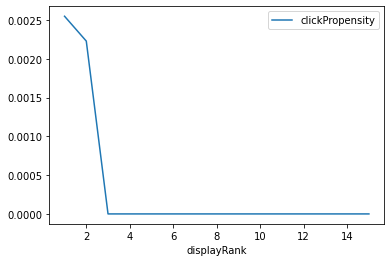

In [61]:

@interact(
    siteId=sorted(pdf1["siteId"].unique()),
    experience=sorted(pdf1["deviceName"].unique()),
    placementId=sorted(pdf1["placementId"].unique())
    
)
def calc_plot(siteId, experience, placementId):
    pdf2 = pdf1.loc[pdf1['deviceName'] == experience]
    pdf3 = pdf2.query(f"siteId == {siteId} and placementId == {placementId}")
    #pdf1["propensity_impression_weights"].plot.hist()
    #print(pdf1['propensity_impression_weights'].max())
    pdf3.plot.line(x="displayRank", y="clickPropensity")

        

In [45]:
pdf2=pdf[['siteId','placementId','displayRank','clickPropensity','experience']].drop_duplicates().sort_values(by='siteId')

In [29]:
experience

['Apps: Android',
 'Apps: Other',
 'Apps: iPad',
 'Apps: iPhone',
 'Browser: Core site',
 'Browser: Half.com',
 'Browser: Other',
 'Browser: mWeb']

In [66]:
list(range(1, 11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [67]:
pdf1=pdf1[pdf1['displayRank'].isin([1,2,3,4,5,6,7,8,9,10])].copy()

In [68]:
experience

['Apps: Android',
 'Apps: iPad',
 'Apps: iPhone',
 'Browser: Core site',
 'Browser: mWeb']

<AxesSubplot:title={'center':'piyi 101251 Browser: mWeb'}, xlabel='displayRank'>

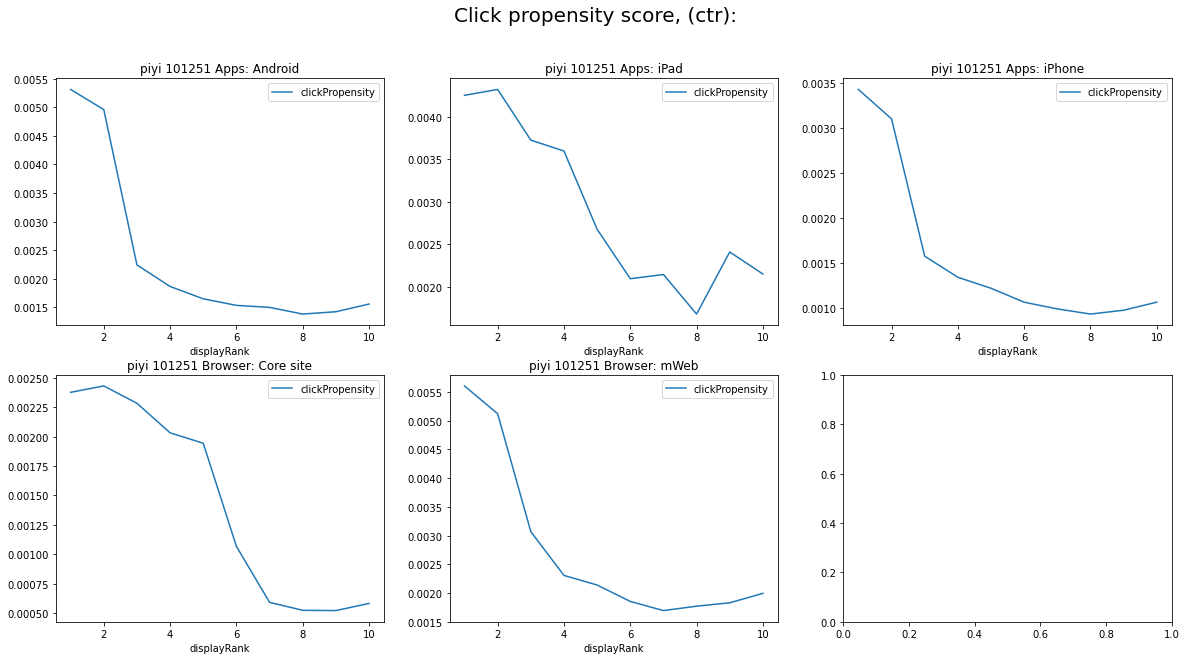

In [34]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
plt.suptitle("Click propensity score, (ctr):",fontsize=20)
pdf1[(pdf1["placementId"]==101251) & (pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[0]) ].plot(ax=axes[0,0],x='displayRank',y='clickPropensity', title='piyi 101251 '+experience[0])
pdf1[(pdf1["placementId"]==101251)&(pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[1])].plot(ax=axes[0,1],x='displayRank',y='clickPropensity', title='piyi 101251 ' +experience[1])
pdf1[(pdf1["placementId"]==101251)&(pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[2])].plot(ax=axes[0,2],x='displayRank',y='clickPropensity', title='piyi 101251 ' +experience[2])
pdf1[(pdf1["placementId"]==101251) & (pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[3]) ].plot(ax=axes[1,0],x='displayRank',y='clickPropensity', title='piyi 101251 ' +experience[3])
pdf1[(pdf1["placementId"]==101251)&(pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[4])].plot(ax=axes[1,1],x='displayRank',y='clickPropensity', title='piyi 101251 ' +experience[4])


<AxesSubplot:title={'center':'piyi 101251 Browser: mWeb'}, xlabel='displayRank'>

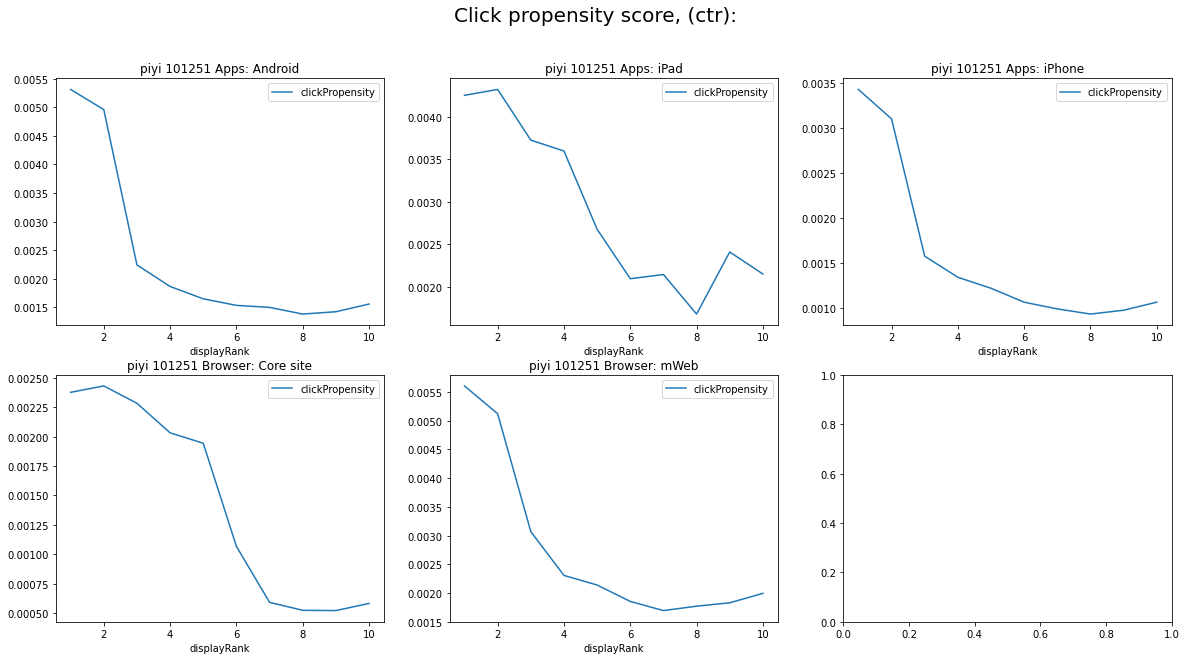

In [71]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
plt.suptitle("Click propensity score, (ctr):",fontsize=20)
pdf1[(pdf1["placementId"]==101251) & (pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[0]) ].plot(ax=axes[0,0],x='displayRank',y='clickPropensity', title='piyi 101251 '+experience[0])
pdf1[(pdf1["placementId"]==101251)&(pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[1])].plot(ax=axes[0,1],x='displayRank',y='clickPropensity', title='piyi 101251 ' +experience[1])
pdf1[(pdf1["placementId"]==101251)&(pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[2])].plot(ax=axes[0,2],x='displayRank',y='clickPropensity', title='piyi 101251 ' +experience[2])
pdf1[(pdf1["placementId"]==101251) & (pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[3]) ].plot(ax=axes[1,0],x='displayRank',y='clickPropensity', title='piyi 101251 ' +experience[3])
pdf1[(pdf1["placementId"]==101251)&(pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[4])].plot(ax=axes[1,1],x='displayRank',y='clickPropensity', title='piyi 101251 ' +experience[4])



<AxesSubplot:title={'center':'piyi 101259 Browser: mWeb'}, xlabel='displayRank'>

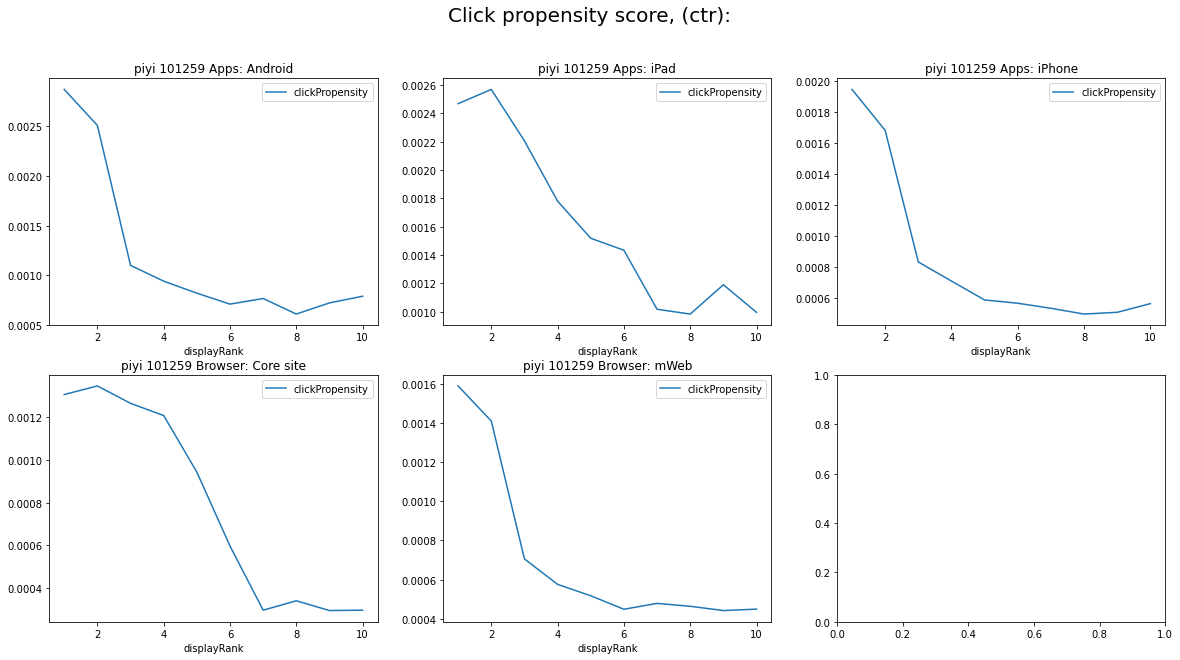

2023-01-22T16:03:31.515+0000: [Full GC (System.gc()) 2023-01-22T16:03:31.515+0000: [Tenured: 62097K->45364K(1398144K), 0.2954028 secs] 384274K->45364K(2027392K), [Metaspace: 131145K->131145K(1173504K)], 0.2955290 secs] [Times: user=0.26 sys=0.03, real=0.30 secs] 


In [72]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
plt.suptitle("Click propensity score, (ctr):",fontsize=20)
pdf1[(pdf1["placementId"]==101259) & (pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[0]) ].plot(ax=axes[0,0],x='displayRank',y='clickPropensity', title='piyi 101259 '+experience[0])
pdf1[(pdf1["placementId"]==101259)&(pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[1])].plot(ax=axes[0,1],x='displayRank',y='clickPropensity', title='piyi 101259 ' +experience[1])
pdf1[(pdf1["placementId"]==101259)&(pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[2])].plot(ax=axes[0,2],x='displayRank',y='clickPropensity', title='piyi 101259 ' +experience[2])
pdf1[(pdf1["placementId"]==101259) & (pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[3]) ].plot(ax=axes[1,0],x='displayRank',y='clickPropensity', title='piyi 101259 ' +experience[3])
pdf1[(pdf1["placementId"]==101259)&(pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[4])].plot(ax=axes[1,1],x='displayRank',y='clickPropensity', title='piyi 101259 ' +experience[4])


<AxesSubplot:title={'center':'piyi 101260 Browser: mWeb'}, xlabel='displayRank'>

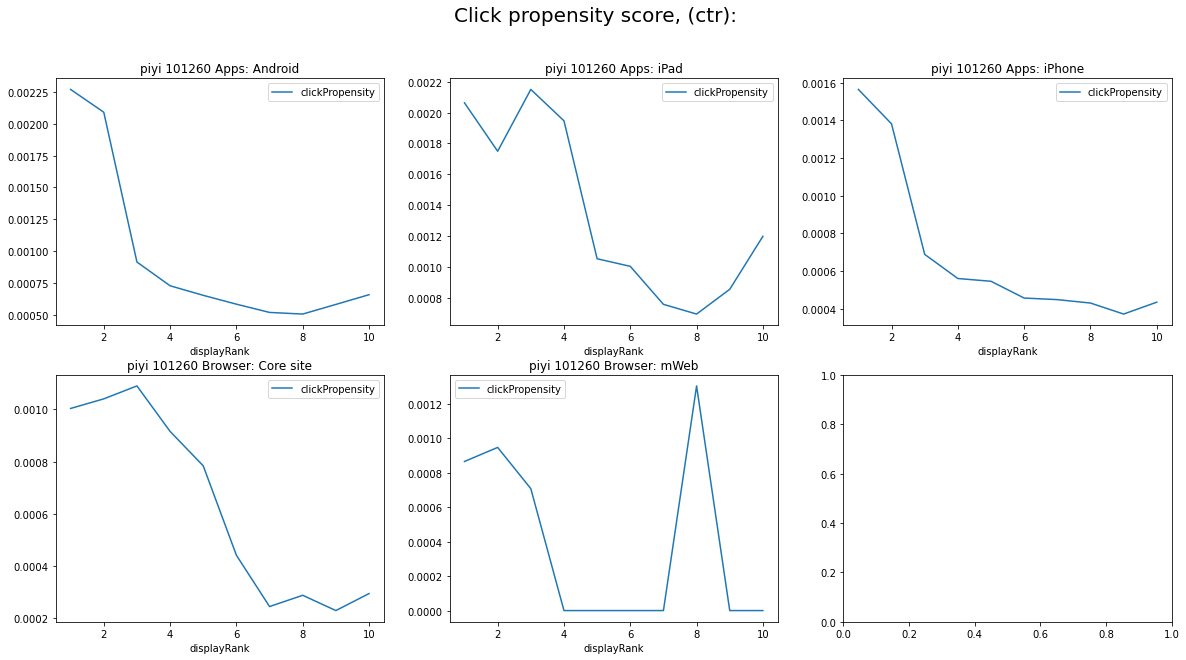

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
plt.suptitle("Click propensity score, (ctr):",fontsize=20)
pdf1[(pdf1["placementId"]==101260) & (pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[0]) ].plot(ax=axes[0,0],x='displayRank',y='clickPropensity', title='piyi 101260 '+experience[0])
pdf1[(pdf1["placementId"]==101260)&(pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[1])].plot(ax=axes[0,1],x='displayRank',y='clickPropensity', title='piyi 101260 ' +experience[1])
pdf1[(pdf1["placementId"]==101260)&(pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[2])].plot(ax=axes[0,2],x='displayRank',y='clickPropensity', title='piyi 101260 ' +experience[2])
pdf1[(pdf1["placementId"]==101260) & (pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[3]) ].plot(ax=axes[1,0],x='displayRank',y='clickPropensity', title='piyi 101260 ' +experience[3])
pdf1[(pdf1["placementId"]==101260)&(pdf1["siteId"]==0)& (pdf1['deviceName'] == experience[4])].plot(ax=axes[1,1],x='displayRank',y='clickPropensity', title='piyi 101260 ' +experience[4])


In [ ]:
piyi=[101251, 101259, 101260] 

In [ ]:
clickPropensity=pdf[['siteId','placementId','displayRank','clickPropensity']].drop_duplicates().sort_values(by='siteId')

In [ ]:
clickPropensity[(clickPropensity["placementId"]==101251) & (clickPropensity["siteId"]==0) ].sort_values(by='displayRank')

<AxesSubplot:ylabel='Frequency'>

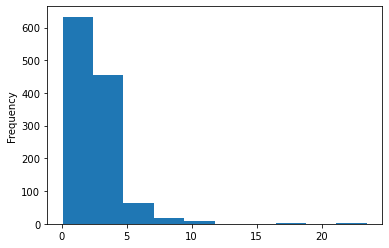

In [36]:
piyi=[101251, 101259, 101260]
pdf1.loc[(pdf1.propensity_impression_weights>0)& (pdf1.placementId.isin (piyi))]["propensity_impression_weights"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

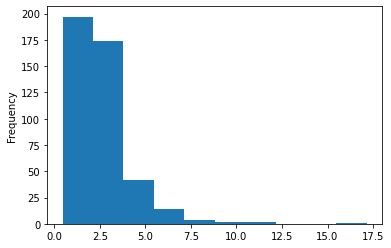

2023-02-16T11:07:41.977+0000: [Full GC (System.gc()) 2023-02-16T11:07:41.977+0000: [Tenured: 56549K->57702K(1398144K), 0.3101416 secs] 281977K->57702K(2027392K), [Metaspace: 130101K->130101K(1173504K)], 0.3102599 secs] [Times: user=0.26 sys=0.05, real=0.32 secs] 
2023-02-16T11:37:41.977+0000: [Full GC (System.gc()) 2023-02-16T11:37:41.977+0000: [Tenured: 57702K->43390K(1398144K), 0.3014293 secs] 280031K->43390K(2027392K), [Metaspace: 130178K->130178K(1173504K)], 0.3015317 secs] [Times: user=0.22 sys=0.08, real=0.31 secs] 
2023-02-16T12:07:41.977+0000: [Full GC (System.gc()) 2023-02-16T12:07:41.977+0000: [Tenured: 43390K->44578K(1398144K), 0.3006935 secs] 265801K->44578K(2027392K), [Metaspace: 130259K->130259K(1173504K)], 0.3008154 secs] [Times: user=0.23 sys=0.07, real=0.31 secs] 
2023-02-16T12:37:41.978+0000: [Full GC (System.gc()) 2023-02-16T12:37:41.978+0000: [Tenured: 44578K->44749K(1398144K), 0.2957317 secs] 266574K->44749K(2027392K), [Metaspace: 130284K->130284K(1173504K)], 0.295

In [43]:
piyi=[101251, 101259, 101260]
pdf1.loc[ (pdf1.propensity_impression_weights>0)&(pdf1.placementId==(piyi[0]))]["propensity_impression_weights"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

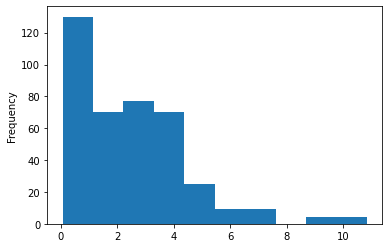

In [39]:
piyi=[101251, 101259, 101260]
pdf1.loc[(pdf1.propensity_impression_weights>0)& (pdf1.placementId==(piyi[1]))]["propensity_impression_weights"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

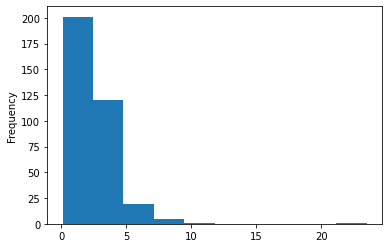

2023-02-16T10:37:41.977+0000: [Full GC (System.gc()) 2023-02-16T10:37:41.977+0000: [Tenured: 56365K->56549K(1398144K), 0.3134588 secs] 286615K->56549K(2027392K), [Metaspace: 130033K->130033K(1173504K)], 0.3136079 secs] [Times: user=0.24 sys=0.07, real=0.32 secs] 


In [41]:
piyi=[101251, 101259, 101260]
pdf1.loc[(pdf1.propensity_impression_weights>0)& (pdf1.placementId==(piyi[2]))]["propensity_impression_weights"].plot.hist()

In [ ]:
spark.sparkContext.stop()